In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read dataset
df = pd.read_csv('/Users/dilshanperera/Documents/resume_app/ResumeDataSet.csv')

In [11]:
# read top 5 values in dataframe
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
# get dataframe size
df.shape

(962, 2)

In [15]:
# Get values and value count in category column 
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

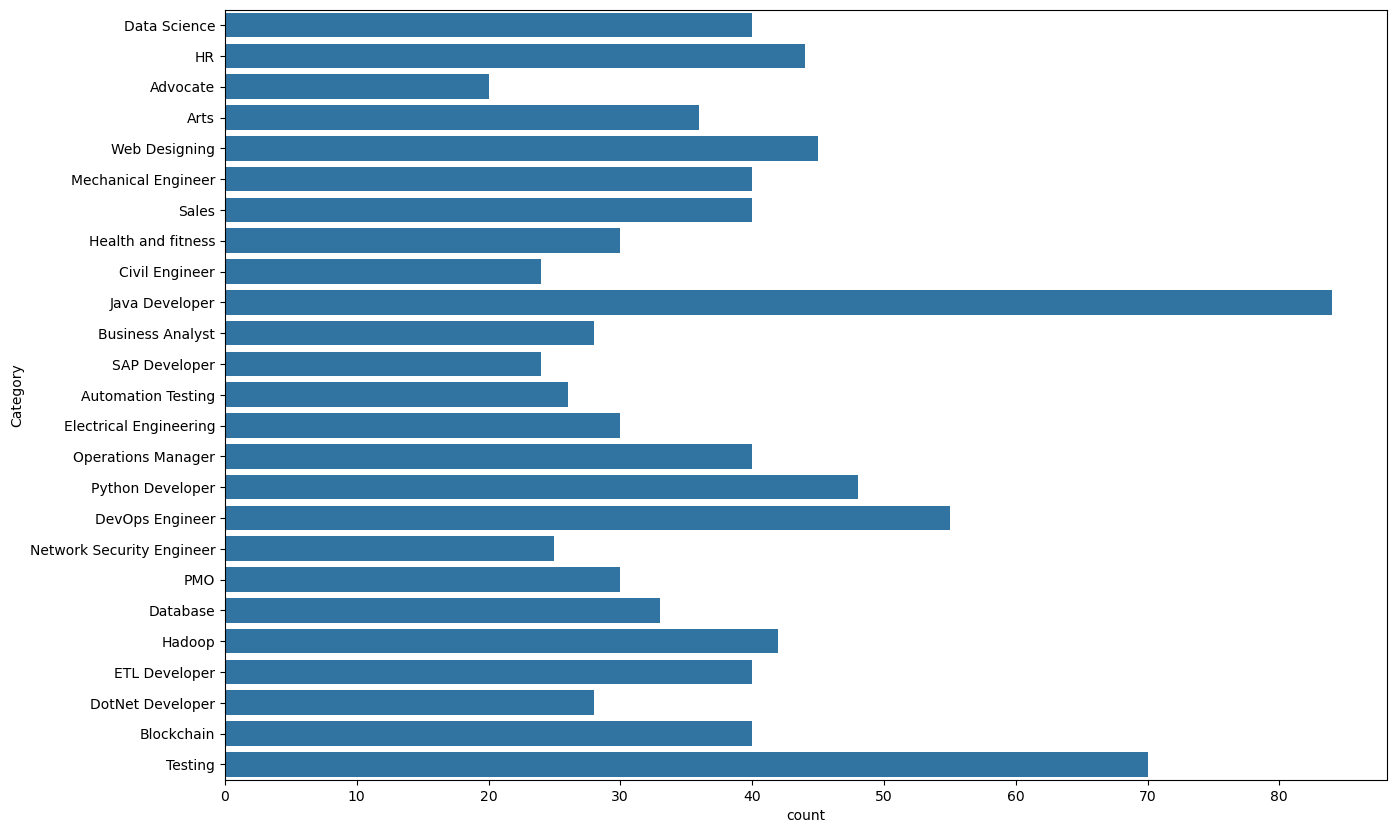

In [35]:
# Display categories and count in figure
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.show()

In [33]:
# retrieve the unique values present in the Category column of the DataFrame
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

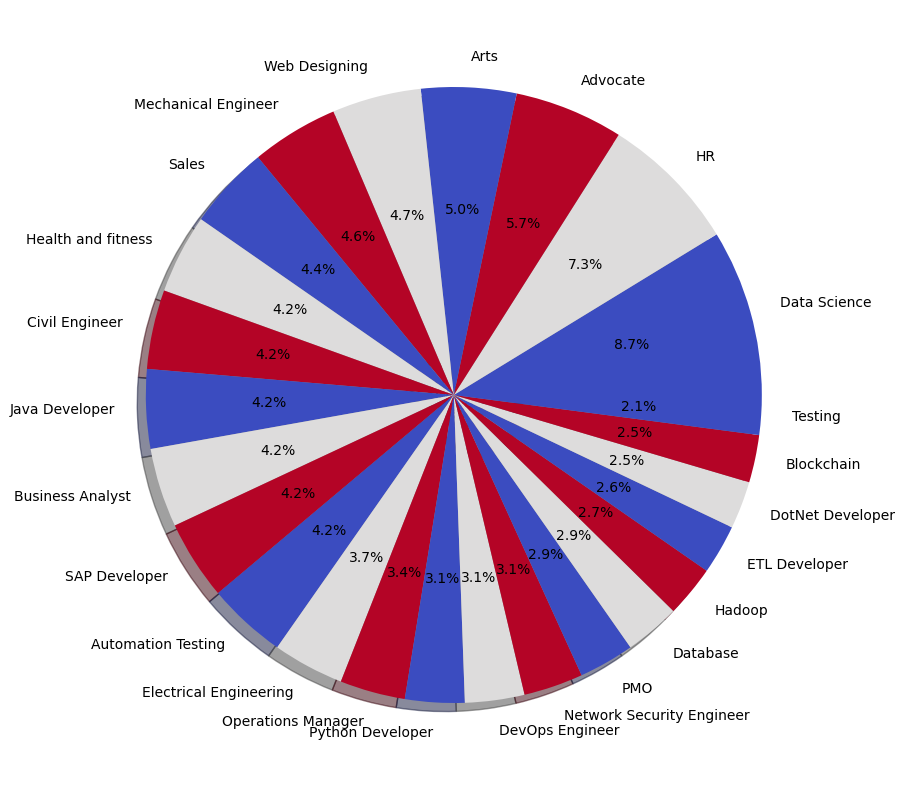

In [39]:
# visualize the distribution of different categories in the Category column of the DataFrame df using a pie chart
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0, 1, 3)))
plt.show()

In [41]:
df['Category'][0]  #first entry of the category column 


'Data Science'

In [43]:
df['Resume'][0]  #first entry of the resume column

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [47]:
# cleaning data
#1 URLs,
# 2 hashtags,
# 3 mentions,
# 4 special letters,
# 5 punctuations:


# The 're' module provides regular expression operations, which are powerful tools for pattern matching and text manipulation.
import re
def cleanResume(txt): #define a function named cleanresume
    cleanText = re.sub('http\S+\s', ' ', txt) #remove URLs
    cleanText = re.sub('RT|cc', ' ', cleanText) #Remove Retweets and CCs
    cleanText = re.sub('#\S+\s', ' ', cleanText) #remove hashtags
    cleanText = re.sub('@\S+', '  ', cleanText)  #remove mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) #remove punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) #remove non ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText) #remove extra whitespaces
    return cleanText

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\]'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\]'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8t/tm_97jbx20n150d933r1fy_c0000gn/T/ipykernel_1881/1269121278.py:12: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt) #remove URLs
/var/folders/8t/tm_97jbx20n150d933r1fy_c0000gn/T/ipykernel_1881/1269121278.py:14: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText) #remove hashtags
/var/folders/8t/tm_97jbx20n150d933r1fy_c0000gn/T/ipykernel_1881/1269121278.py:15: SyntaxWarning: invalid escape seque

In [49]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [53]:
#applying the cleanResume function to each element of the Resume column 
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [55]:
#after applying the cleanresume function it gives more clear and clean descriptions for resume column
df['Resume'][0] 

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [57]:
#words into categorical values
from sklearn.preprocessing import LabelEncoder #imports the LabelEncoder class from the sklearn.preprocessing module
le = LabelEncoder() #creates an instance of the LabelEncoder class

In [59]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category']) #encodes the categorical data in the 'Category' column 
#The LabelEncoder in scikit-learn encodes categorical labels in alphabetical order by default.

In [61]:
df.Category.unique() 

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [63]:
#Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer #imports the TfidfVectorizer class from the sklearn.feature_extraction.text module.

tfidf = TfidfVectorizer(stop_words='english')  # Create TF-IDF vectorizer
#stop_words='english' argument specifies that we want to remove English stop words
#(common words like "the", "a", "an", etc.) during the vectorization process.

tfidf.fit(df['Resume'])  # Fit the vectorizer to the resume column

requiredText = tfidf.transform(df['Resume'])  # Transform resumes into TF-IDF vectors

In [67]:
requiredText


<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [71]:
#Splitting

from sklearn.model_selection import train_test_split #import train_test_split function from the sklearn.model_selection module


In [77]:
#splits the dataset into training and testing sets,
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [79]:
X_train.shape

(769, 7351)

In [81]:
X_test.shape

(193, 7351)

In [83]:
#train the model

# Imports the KNeighborsClassifier class for KNN classification.
from sklearn.neighbors import KNeighborsClassifier
#Imports the OneVsRestClassifier class for handling multi-class classification problems.
from sklearn.multiclass import OneVsRestClassifier
#Imports the accuracy_score function for evaluating model performance.
from sklearn.metrics import accuracy_score


#Creates a One-vs-Rest Classifier that wraps a KNN classifier.
#This approach is suitable for multi-class problems where a separate KNN model is trained for each category.
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)



OneVsRestClassifier(estimator=KNeighborsClassifier())

In [85]:
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [87]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [92]:
#prediction system
import pickle #imports the pickle module
pickle.dump(tfidf,open('tfidf.pkl','wb')) #Opens a file named "tfidf.pkl" in binary write mode ('wb').
#This file will store the serialized version of the tfidf object.
pickle.dump(clf, open('clf.pkl', 'wb'))

In [94]:
#defines a string variable 
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [98]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


In [100]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Print the directory path
print("Current directory:", current_dir)

Current directory: /Users/dilshanperera
